## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [2]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

data.head()

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
X_train.shape

(294, 13)

### Regression Model Build

In [7]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

### train

In [9]:
history = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_test, y_test),
                   verbose=1)

Epoch 1/500
3/3 [==============================] - 1s 137ms/step - loss: 614.0307 - mse: 614.0307 - val_loss: 497.8148 - val_mse: 497.8148
Epoch 2/500
3/3 [==============================] - 0s 18ms/step - loss: 599.2557 - mse: 599.2557 - val_loss: 483.6750 - val_mse: 483.6750
Epoch 3/500
3/3 [==============================] - 0s 21ms/step - loss: 584.5179 - mse: 584.5179 - val_loss: 469.8008 - val_mse: 469.8008
Epoch 4/500
3/3 [==============================] - 0s 12ms/step - loss: 569.8116 - mse: 569.8116 - val_loss: 456.0646 - val_mse: 456.0646
Epoch 5/500
3/3 [==============================] - 0s 13ms/step - loss: 555.0798 - mse: 555.0798 - val_loss: 442.1485 - val_mse: 442.1485
Epoch 6/500
3/3 [==============================] - 0s 13ms/step - loss: 540.0607 - mse: 540.0607 - val_loss: 428.0101 - val_mse: 428.0101
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 524.3483 - mse: 524.3483 - val_loss: 413.5922 - val_mse: 413.5922
Epoch 8/500
3/3 [================

3/3 [==============================] - 0s 22ms/step - loss: 10.1967 - mse: 10.1967 - val_loss: 9.3661 - val_mse: 9.3661
Epoch 62/500
3/3 [==============================] - 0s 17ms/step - loss: 10.0926 - mse: 10.0926 - val_loss: 9.2846 - val_mse: 9.2846
Epoch 63/500
3/3 [==============================] - 0s 25ms/step - loss: 9.9913 - mse: 9.9913 - val_loss: 9.1847 - val_mse: 9.1847
Epoch 64/500
3/3 [==============================] - 0s 29ms/step - loss: 9.9022 - mse: 9.9022 - val_loss: 9.0876 - val_mse: 9.0876
Epoch 65/500
3/3 [==============================] - 0s 12ms/step - loss: 9.8045 - mse: 9.8045 - val_loss: 9.0011 - val_mse: 9.0011
Epoch 66/500
3/3 [==============================] - 0s 13ms/step - loss: 9.7234 - mse: 9.7234 - val_loss: 8.9103 - val_mse: 8.9103
Epoch 67/500
3/3 [==============================] - 0s 18ms/step - loss: 9.6233 - mse: 9.6233 - val_loss: 8.8322 - val_mse: 8.8322
Epoch 68/500
3/3 [==============================] - 0s 19ms/step - loss: 9.5417 - mse: 9.541

3/3 [==============================] - 0s 13ms/step - loss: 6.9759 - mse: 6.9759 - val_loss: 6.7880 - val_mse: 6.7880
Epoch 124/500
3/3 [==============================] - 0s 17ms/step - loss: 6.9425 - mse: 6.9425 - val_loss: 6.7678 - val_mse: 6.7678
Epoch 125/500
3/3 [==============================] - 0s 30ms/step - loss: 6.9131 - mse: 6.9131 - val_loss: 6.7513 - val_mse: 6.7513
Epoch 126/500
3/3 [==============================] - 0s 20ms/step - loss: 6.8871 - mse: 6.8871 - val_loss: 6.7166 - val_mse: 6.7166
Epoch 127/500
3/3 [==============================] - 0s 22ms/step - loss: 6.8629 - mse: 6.8629 - val_loss: 6.6909 - val_mse: 6.6909
Epoch 128/500
3/3 [==============================] - 0s 19ms/step - loss: 6.8386 - mse: 6.8386 - val_loss: 6.6720 - val_mse: 6.6720
Epoch 129/500
3/3 [==============================] - 0s 14ms/step - loss: 6.8148 - mse: 6.8148 - val_loss: 6.6552 - val_mse: 6.6552
Epoch 130/500
3/3 [==============================] - 0s 16ms/step - loss: 6.7941 - mse: 6.

3/3 [==============================] - 0s 17ms/step - loss: 6.0950 - mse: 6.0950 - val_loss: 6.5247 - val_mse: 6.5247
Epoch 186/500
3/3 [==============================] - 0s 16ms/step - loss: 6.0840 - mse: 6.0840 - val_loss: 6.5301 - val_mse: 6.5301
Epoch 187/500
3/3 [==============================] - 0s 20ms/step - loss: 6.0751 - mse: 6.0751 - val_loss: 6.5200 - val_mse: 6.5200
Epoch 188/500
3/3 [==============================] - 0s 20ms/step - loss: 6.0758 - mse: 6.0758 - val_loss: 6.5265 - val_mse: 6.5265
Epoch 189/500
3/3 [==============================] - 0s 15ms/step - loss: 6.0570 - mse: 6.0570 - val_loss: 6.5445 - val_mse: 6.5445
Epoch 190/500
3/3 [==============================] - 0s 13ms/step - loss: 6.0497 - mse: 6.0497 - val_loss: 6.5662 - val_mse: 6.5662
Epoch 191/500
3/3 [==============================] - 0s 17ms/step - loss: 6.0518 - mse: 6.0518 - val_loss: 6.5719 - val_mse: 6.5719
Epoch 192/500
3/3 [==============================] - 0s 12ms/step - loss: 6.0484 - mse: 6.

3/3 [==============================] - 0s 19ms/step - loss: 5.7263 - mse: 5.7263 - val_loss: 6.4958 - val_mse: 6.4958
Epoch 248/500
3/3 [==============================] - 0s 14ms/step - loss: 5.7156 - mse: 5.7156 - val_loss: 6.5049 - val_mse: 6.5049
Epoch 249/500
3/3 [==============================] - 0s 15ms/step - loss: 5.7126 - mse: 5.7126 - val_loss: 6.5467 - val_mse: 6.5467
Epoch 250/500
3/3 [==============================] - 0s 17ms/step - loss: 5.7105 - mse: 5.7105 - val_loss: 6.5735 - val_mse: 6.5735
Epoch 251/500
3/3 [==============================] - 0s 31ms/step - loss: 5.7086 - mse: 5.7086 - val_loss: 6.6070 - val_mse: 6.6070
Epoch 252/500
3/3 [==============================] - 0s 14ms/step - loss: 5.7158 - mse: 5.7158 - val_loss: 6.6271 - val_mse: 6.6271
Epoch 253/500
3/3 [==============================] - 0s 20ms/step - loss: 5.7085 - mse: 5.7085 - val_loss: 6.6228 - val_mse: 6.6228
Epoch 254/500
3/3 [==============================] - 0s 19ms/step - loss: 5.6990 - mse: 5.

3/3 [==============================] - 0s 18ms/step - loss: 5.4890 - mse: 5.4890 - val_loss: 6.5286 - val_mse: 6.5286
Epoch 310/500
3/3 [==============================] - 0s 17ms/step - loss: 5.4822 - mse: 5.4822 - val_loss: 6.5135 - val_mse: 6.5135
Epoch 311/500
3/3 [==============================] - 0s 14ms/step - loss: 5.4790 - mse: 5.4790 - val_loss: 6.5028 - val_mse: 6.5028
Epoch 312/500
3/3 [==============================] - 0s 30ms/step - loss: 5.4777 - mse: 5.4777 - val_loss: 6.5160 - val_mse: 6.5160
Epoch 313/500
3/3 [==============================] - 0s 24ms/step - loss: 5.4776 - mse: 5.4776 - val_loss: 6.5122 - val_mse: 6.5122
Epoch 314/500
3/3 [==============================] - 0s 18ms/step - loss: 5.4812 - mse: 5.4812 - val_loss: 6.5090 - val_mse: 6.5090
Epoch 315/500
3/3 [==============================] - 0s 16ms/step - loss: 5.4715 - mse: 5.4715 - val_loss: 6.5252 - val_mse: 6.5252
Epoch 316/500
3/3 [==============================] - 0s 23ms/step - loss: 5.4817 - mse: 5.

3/3 [==============================] - 0s 24ms/step - loss: 5.2813 - mse: 5.2813 - val_loss: 6.4588 - val_mse: 6.4588
Epoch 372/500
3/3 [==============================] - 0s 17ms/step - loss: 5.2853 - mse: 5.2853 - val_loss: 6.4428 - val_mse: 6.4428
Epoch 373/500
3/3 [==============================] - 0s 17ms/step - loss: 5.2780 - mse: 5.2780 - val_loss: 6.4455 - val_mse: 6.4455
Epoch 374/500
3/3 [==============================] - 0s 17ms/step - loss: 5.2734 - mse: 5.2734 - val_loss: 6.4631 - val_mse: 6.4631
Epoch 375/500
3/3 [==============================] - 0s 15ms/step - loss: 5.2636 - mse: 5.2636 - val_loss: 6.5020 - val_mse: 6.5020
Epoch 376/500
3/3 [==============================] - 0s 24ms/step - loss: 5.2642 - mse: 5.2642 - val_loss: 6.5449 - val_mse: 6.5449
Epoch 377/500
3/3 [==============================] - 0s 18ms/step - loss: 5.2601 - mse: 5.2601 - val_loss: 6.5555 - val_mse: 6.5555
Epoch 378/500
3/3 [==============================] - 0s 16ms/step - loss: 5.2632 - mse: 5.

3/3 [==============================] - 0s 13ms/step - loss: 5.0610 - mse: 5.0610 - val_loss: 6.5798 - val_mse: 6.5798
Epoch 434/500
3/3 [==============================] - 0s 14ms/step - loss: 5.0585 - mse: 5.0585 - val_loss: 6.5263 - val_mse: 6.5263
Epoch 435/500
3/3 [==============================] - 0s 13ms/step - loss: 5.0590 - mse: 5.0590 - val_loss: 6.5136 - val_mse: 6.5136
Epoch 436/500
3/3 [==============================] - 0s 13ms/step - loss: 5.0529 - mse: 5.0529 - val_loss: 6.5242 - val_mse: 6.5242
Epoch 437/500
3/3 [==============================] - 0s 19ms/step - loss: 5.0398 - mse: 5.0398 - val_loss: 6.5499 - val_mse: 6.5499
Epoch 438/500
3/3 [==============================] - 0s 20ms/step - loss: 5.0447 - mse: 5.0447 - val_loss: 6.5733 - val_mse: 6.5733
Epoch 439/500
3/3 [==============================] - 0s 21ms/step - loss: 5.0376 - mse: 5.0376 - val_loss: 6.5984 - val_mse: 6.5984
Epoch 440/500
3/3 [==============================] - 0s 16ms/step - loss: 5.0452 - mse: 5.

3/3 [==============================] - 0s 22ms/step - loss: 4.9026 - mse: 4.9026 - val_loss: 6.5838 - val_mse: 6.5838
Epoch 496/500
3/3 [==============================] - 0s 19ms/step - loss: 4.8931 - mse: 4.8931 - val_loss: 6.5863 - val_mse: 6.5863
Epoch 497/500
3/3 [==============================] - 0s 32ms/step - loss: 4.8750 - mse: 4.8750 - val_loss: 6.5540 - val_mse: 6.5540
Epoch 498/500
3/3 [==============================] - 0s 29ms/step - loss: 4.8798 - mse: 4.8798 - val_loss: 6.5338 - val_mse: 6.5338
Epoch 499/500
3/3 [==============================] - 0s 27ms/step - loss: 4.8780 - mse: 4.8780 - val_loss: 6.5340 - val_mse: 6.5340
Epoch 500/500
3/3 [==============================] - 0s 33ms/step - loss: 4.8796 - mse: 4.8796 - val_loss: 6.5594 - val_mse: 6.5594


### predict

In [10]:
model.evaluate(X_test, y_test, verbose=0)

[6.559439659118652, 6.559439659118652]

In [11]:
y_predict = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


### $r^2$ 계산

In [12]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.8796489838383146

### 시각화

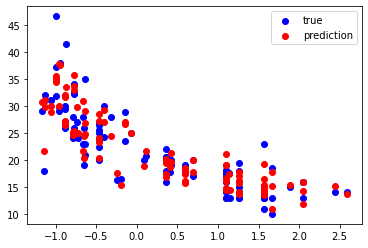

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test[:, 0], y_test, c='b', label="true")
plt.scatter(X_test[:, 0], y_predict, c='r', label="prediction")
plt.legend()